In [901]:
from qwind import wind
from qwind.radiation import simple_sed, qsosed
from qwind import streamline, aux_numba
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit
import importlib
from qwind import plotting
importlib.reload(plotting)
from pyagn import sed
importlib.reload(wind)
importlib.reload(streamline)
importlib.reload(aux_numba)
importlib.reload(simple_sed)
importlib.reload(qsosed)

<module 'qwind.radiation.qsosed' from '/cosma7/data/dp004/dc-quer1/qwind/qwind/radiation/qsosed.py'>

In [902]:
M_range = [np.geomspace(1e7, 1e10,10)[-5]]
mdot_range = np.geomspace(0.1, 1, 4)

In [903]:
print("%e"%(M_range[0]))

4.641589e+08


In [939]:
models = []
for M in M_range:
    for mdot in [0.8]:
        models.append(wind.Qwind(M=M,
                                 mdot = mdot,
                                 n_cpus = 4,
                                 nr = 60,
                                 r_in = 50,
                                 r_out = 1600,
                                 rho_shielding = 1e9,
                                 T=2e6,
                                 radiation_mode = "SimpleSED",
                                 modes = []))
    

r_in: 50.000000 
 r_out: 1600.000000


In [940]:
model = models[0]

In [941]:
model.radiation.r_x

68.27225741802673

In [942]:
line = model.line(r_0 = model.lines_r_range[0], rho_0 = 1e9, v_z_0=5e7)

In [943]:
line.iterate(500000)

Failed wind! 



In [944]:
model.start_lines(rho = 1e9, v_z_0 = 5e7, niter = 50000)

Starting line iteration
multiple cpus
Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 

Failed wind! 



Failed wind! 

No wind escapes


In [945]:
lines = model.lines

In [946]:
lines[0].tau_dr_shielding

0.045595195574017

(10, 400)

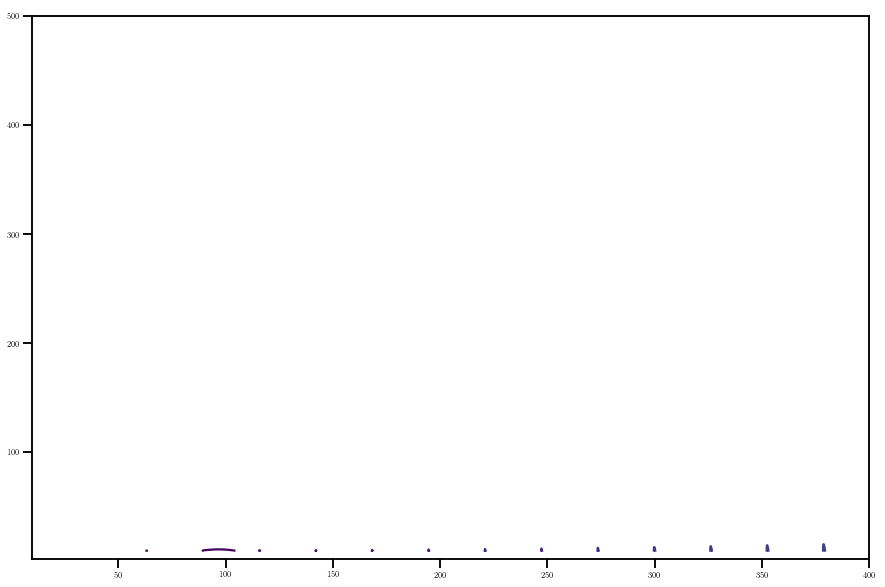

In [947]:
plt.figure(figsize=(15,10))
cmap = plt.get_cmap("viridis")
cmap = cmap(np.linspace(0,1, len(lines)))
for i,line in enumerate(lines):
    plt.plot(line.r_hist, line.z_hist, color = cmap[i])
plt.ylim(2,500)
plt.xlim(10,400)

In [690]:
line1 = lines[0]
line1.escaped

True

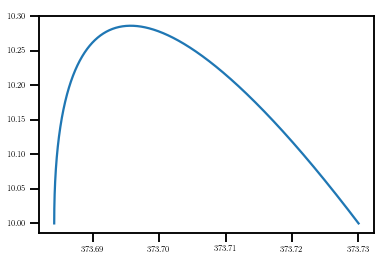

In [524]:
plt.plot(line1.r_hist, line1.z_hist)

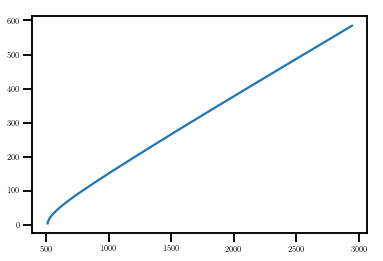

In [432]:
plt.plot(line2.r_hist, line2.z_hist)

In [504]:
model.mdot_w

3.040619258768207e+25

In [505]:
model.mdot_w / (constants.Ms / constants.year)

0.48255384793976097

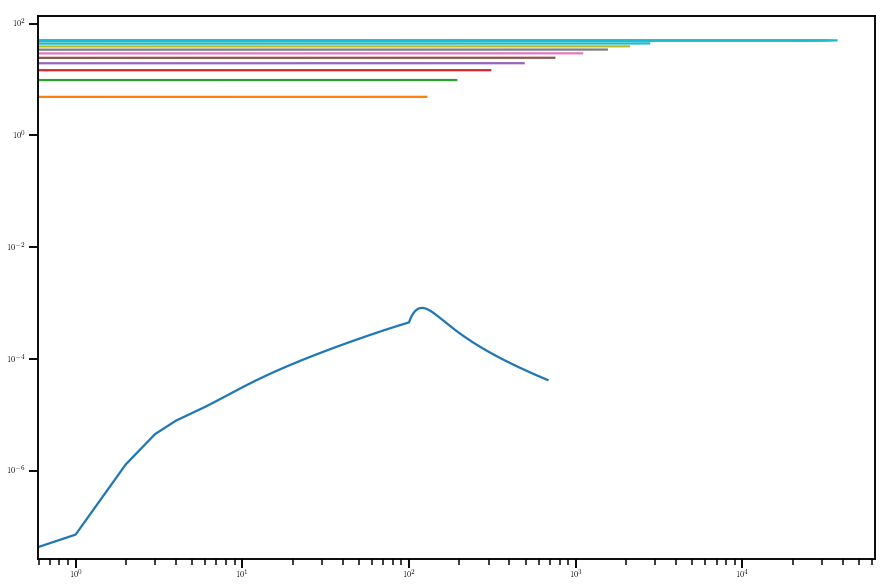

In [301]:
plt.figure(figsize=(15,10))
cmap = plt.get_cmap("viridis")
cmap = cmap(np.linspace(0,1, len(lines)))
for i,line in enumerate(lines):
    #if line.escaped is False:
    #    continue
    #plt.loglog(line.tau_eff_hist, color = cmap[i], linewidth = 5)
    #plt.loglog(np.array(line.tau_dr_hist) * (np.array(line.r_hist) - line.r_0), color = 'red')
    plt.loglog(line.tau_uv_hist)

    

In [302]:
line = lines[12]
line.v_T_hist[-1]

0.00033380906617668676

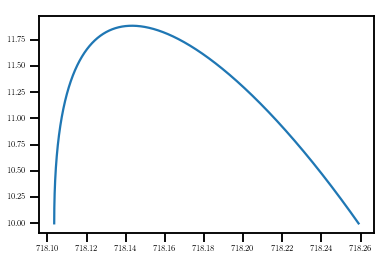

In [303]:
plt.plot(line.r_hist, line.z_hist)

In [173]:
line.iterate(niter=100000)

out of grid 




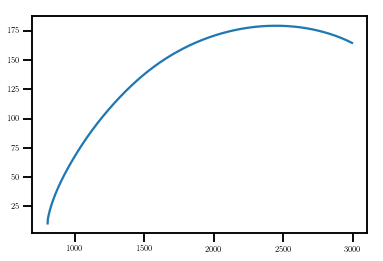

In [174]:
plt.plot(line.r_hist, line.z_hist)

In [436]:
model.mdot_w / (model.radiation.sed_class.bolometric_luminosity / 0.06 / constants.c**2)

0.0037178625940308867

In [437]:
model.mdot_w / (constants.Ms / constants.year)

0.006877208881622386

In [137]:
model.mdot_w

3.8274991428743843e+25

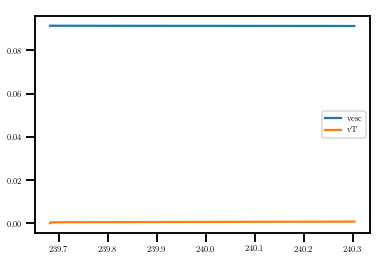

In [36]:
v_escaped = [model.v_esc(d) for d in line.d_hist]
plt.plot(line.d_hist, v_escaped, label = r"vesc")
plt.plot(line.d_hist, line.v_T_hist, label = r"vT")
plt.legend()
plt.show()

In [23]:
model.mdot_w * 2 / (model.radiation.sed_class.bolometric_luminosity / (0.06 * constants.c**2))

0.05489544296792905

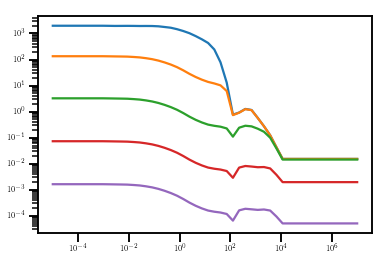

In [504]:
t_range = np.geomspace(1e-7,1e4,5)
xi_range = np.geomspace(1e-5, 1e7)
for t in t_range:
    fm = np.array([model.radiation.force_multiplier(t, xi) for xi in xi_range])
    plt.loglog(xi_range, fm)

In [39]:
def read_qwind_file(file):
    df = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    return df

In [40]:
originals = glob("../../qwind_original/bin64/qw_paper/qwi*")

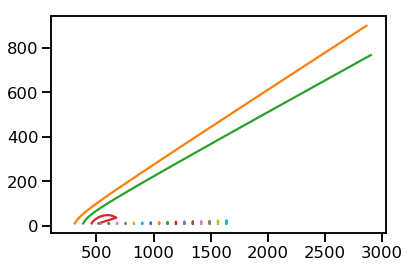

In [42]:
for line in test.lines:
    plt.plot(line.r_hist, line.z_hist)
#plt.xlim(0,1000)
#plt.ylim(0,100)

In [68]:
test.lines[1].escaped

True

In [81]:
asd = wind.Qwind(M=1e8, mdot = 0.5)

r_in: 200.000000 
 r_out: 1600.000000


In [84]:
A = 8 * np.pi * asd.Rg**2 * (400**2 - 200**2)
A

6.575996328521393e+32

In [85]:
rho =  2e8 * constants.m_p 

In [89]:
Mdot = A * rho * 1e7 
print(Mdot / constants.Ms * constants.year)

0.03491186721998649


In [80]:
Mdot / (test.bol_luminosity / (test.eta * constants.c**2))

0.24614288838393683

In [69]:
line = test.lines[1]

In [61]:
line.rho_hist[0]

200000000.0

In [60]:
print("%e"%line.rho_hist[-1])

8.669246e+08


(0, 100)

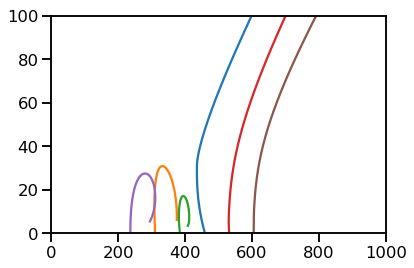

In [27]:
for file in originals:
    df = read_qwind_file(file)
    plt.plot(df.R, df.Z)
plt.xlim(0,1000)
plt.ylim(0,100)

In [29]:
originals

['../../qwind_original/bin64/qw_paper/qwind.dat04',
 '../../qwind_original/bin64/qw_paper/qwind.dat02',
 '../../qwind_original/bin64/qw_paper/qwind.dat03',
 '../../qwind_original/bin64/qw_paper/qwind.dat05',
 '../../qwind_original/bin64/qw_paper/qwind.dat01',
 '../../qwind_original/bin64/qw_paper/qwind.dat06']